import libraries


In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score


load dataset

In [2]:
data = fetch_california_housing()
X = data.data
y = data.target


In [4]:
print("Feature names (California Housing Dataset):")
for i, feature in enumerate(data.feature_names):
    print(f"{i+1}. {feature}")

Feature names (California Housing Dataset):
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude


Load dataset


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

random forest regressor


In [6]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)


evaluate


In [7]:
print("Random Forest Regressor Results")
print("Mean Squared Error:", mean_squared_error(y_test, rf_predictions))
print("R² Score:", r2_score(y_test, rf_predictions))


Random Forest Regressor Results
Mean Squared Error: 0.25650512920799395
R² Score: 0.8045734925119942


adaboost


In [8]:
ada_regressor = AdaBoostRegressor(n_estimators=100, random_state=42)
ada_regressor.fit(X_train, y_train)
ada_predictions = ada_regressor.predict(X_test)


In [9]:
print("\nAdaBoost Regressor Results")
print("Mean Squared Error:", mean_squared_error(y_test, ada_predictions))
print("R² Score:", r2_score(y_test, ada_predictions))



AdaBoost Regressor Results
Mean Squared Error: 0.7592302405796748
R² Score: 0.4215565405888958


In [11]:
print("\n Enter values to predict house price (use realistic values):")
user_input = []
for feature in data.feature_names:
 value = float(input(f"Enter value for {feature}: "))
 user_input.append(value)


 Enter values to predict house price (use realistic values):
Enter value for MedInc: 2
Enter value for HouseAge: 12
Enter value for AveRooms: 3
Enter value for AveBedrms: 2
Enter value for Population: 7
Enter value for AveOccup: 8
Enter value for Latitude: 56
Enter value for Longitude: 89


In [13]:
import numpy as np
user_input = np.array(user_input).reshape(1, -1)

predict using both models


In [14]:
rf_user_pred = rf_regressor.predict(user_input)[0]
ada_user_pred = ada_regressor.predict(user_input)[0]


In [15]:
print("\nPredicted Median House Value (in $100,000s):")
print(f"Random Forest Prediction: {rf_user_pred:.3f}")
print(f"AdaBoost Prediction: {ada_user_pred:.3f}")


Predicted Median House Value (in $100,000s):
Random Forest Prediction: 1.452
AdaBoost Prediction: 1.302


visualization


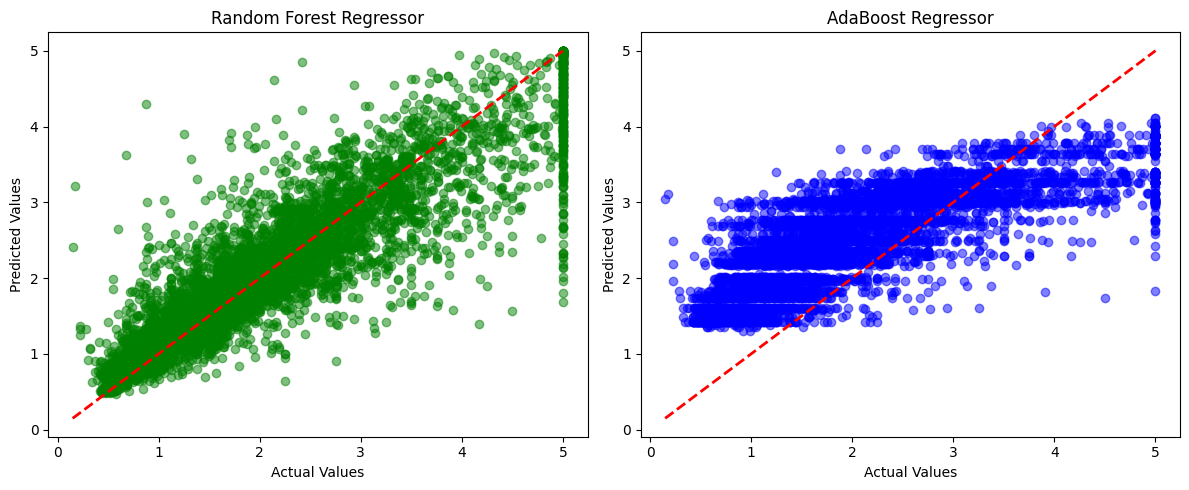

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_predictions, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor')

plt.subplot(1, 2, 2)
plt.scatter(y_test, ada_predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('AdaBoost Regressor')
plt.tight_layout()
plt.show()